In [1]:
import matplotlib.pyplot as plt
import numpy as np
# import math
# from scipy.misc import imsave
%matplotlib inline

In [2]:
def convert_RGB_to_monochrome_BW(image_1,threshold=100):
    img_1=image_1   # plt.imread(image_1)
    img_2=np.zeros((img_1.shape[0],img_1.shape[1]))
    for i in range(img_2.shape[0]):
        for j in range(img_2.shape[1]):
            if(img_1[i,j,0]/3+img_1[i,j,1]/3+img_1[i,j,1]/3)>threshold:
                img_2[i,j]=0
            else:
                img_2[i,j]=1
    return img_2

In [3]:
import os
os.getcwd(),os.listdir()

('C:\\Users\\ramaz\\Desktop\\İmage-Processing\\opening_and_closing',
 ['.ipynb_checkpoints', 'Adsız.jpg', 'opening_and_closing.ipynb'])

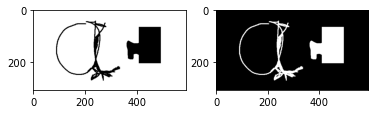

In [4]:
path_file=r"C:\\Users\\ramaz\\Desktop\\İmage-Processing\\opening_and_closing\\Adsız.jpg"
img_1=plt.imread(path_file)

img_2=convert_RGB_to_monochrome_BW(img_1,0.5)

plt.subplot(1,2,1),plt.imshow(img_1)
plt.subplot(1,2,2),plt.imshow(img_2,cmap='gray')

plt.show()

In [5]:
def define_mask_1():
    mask_1=[[1,1,1],[1,1,1],[1,1,1]]
       ### mask,mask[1][2],mask[0][0],mask[2][2]  # mask[3][1]   error
       ### for i in range(3):
       ###     for j in range(3):
       ###         print(mask[i][j],end="")
       ###     print()
    return mask_1
def define_mask_2():
    mask_1=[[0,0,0],[0,0,0],[0,0,0]]
    mask,mask[1][2],mask[0][0],mask[2][2]  # mask[3][1]   error
    for i in range(3):
        for j in range(3):
            print(mask[i][j],end="")
        print()
    return mask_1
def my_dilation(img_1,mask,morphologyOperation='dilation'):
    m=img_1.shape[0]   # 100
    n=img_1.shape[1]   # 100
    img_2=np.zeros((m,n),dtype='uint8')
    for i in range(1,m-1):   # padding
        for j in range(1,n-1):
            # print(i,j,img_1[i,j])
            # apply_mask_1 for dilation
            x_1=img_1[i,j] == mask[1][1]
            
            x_2=img_1[i-1,j-1] == mask[0][0]
            x_3=img_1[i-1,j] == mask[0][1]
            x_4=img_1[i-1,j+1] == mask[0][2]
            
            x_5=img_1[i+1,j-1] == mask[2][0]
            x_6=img_1[i+1,j] == mask[2][1]
            x_7=img_1[i+1,j+1] == mask[2][2]
            
            x_8=img_1[i,j-1] == mask[1][0]
            x_9=img_1[i,j+1] == mask[1][2]
            
            if(morphologyOperation=='dilation'):
                result_1=x_1 or x_2 or x_3 or x_4 or x_5
                result_2=x_6 or x_7 or x_8 or x_9

                result = result_1 or result_2
            
            elif(morphologyOperation=='erosion'):
                result_1=x_1 and x_2 and x_3 and x_4 and x_5
                result_2=x_6 and x_7 and x_8 and x_9
                
                result = result_1 and result_2
                
            img_2[i,j]=result
    return img_2

In [6]:
img_3=my_dilation(img_2,define_mask_1())
img_4=my_dilation(img_3,define_mask_1())
img_5=my_dilation(img_4,define_mask_1())

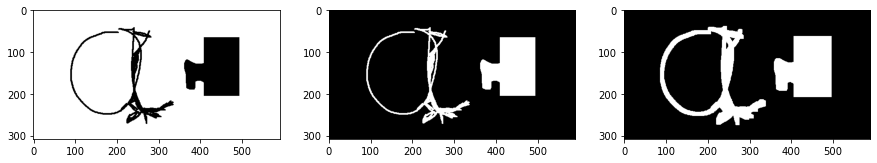

In [7]:
plt.figure(figsize=(15,15))
plt.subplot(1,3,1),plt.imshow(img_1)
plt.subplot(1,3,2),plt.imshow(img_2,cmap='gray')
plt.subplot(1,3,3),plt.imshow(img_5,cmap='gray')
plt.show()

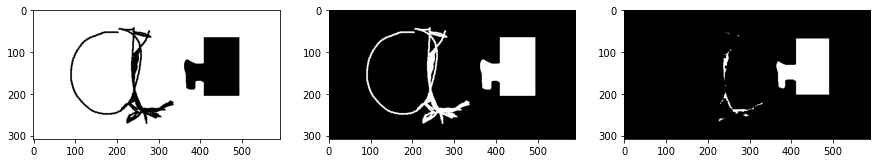

In [8]:
img_3=my_dilation(img_2,define_mask_1(),'erosion')
img_4=my_dilation(img_3,define_mask_1(),'erosion')
img_5=my_dilation(img_4,define_mask_1(),'erosion')
plt.figure(figsize=(15,15))
plt.subplot(1,3,1),plt.imshow(img_1)
plt.subplot(1,3,2),plt.imshow(img_2,cmap='gray')
plt.subplot(1,3,3),plt.imshow(img_5,cmap='gray')
plt.show()

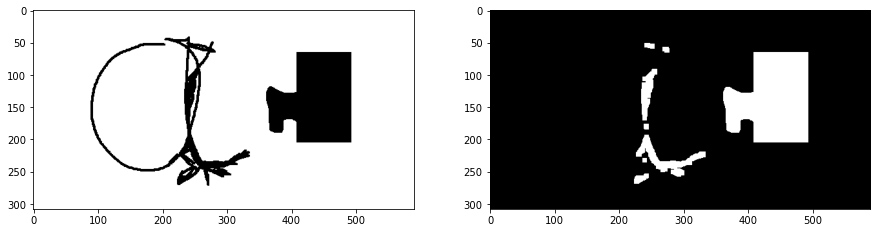

In [9]:
img_3=my_dilation(img_2,define_mask_1(),'erosion')  # opening operation
img_4=my_dilation(img_3,define_mask_1(),'erosion')
img_5=my_dilation(img_4,define_mask_1(),'erosion')

img_6=my_dilation(img_5,define_mask_1(),'dilation')
img_7=my_dilation(img_6,define_mask_1(),'dilation')
img_8=my_dilation(img_7,define_mask_1(),'dilation')

plt.figure(figsize=(15,15))
plt.subplot(1,2,1),plt.imshow(img_1)
plt.subplot(1,2,2),plt.imshow(img_8,cmap='gray')
plt.show()

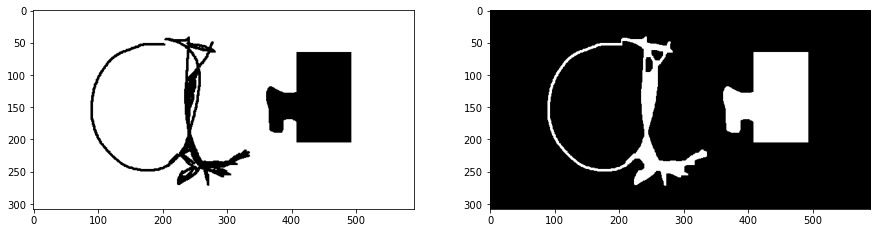

In [10]:
img_3=my_dilation(img_2,define_mask_1(),'dilation')  # closing operation
img_4=my_dilation(img_3,define_mask_1(),'dilation')
img_5=my_dilation(img_4,define_mask_1(),'dilation')

img_6=my_dilation(img_5,define_mask_1(),'erosion')
img_7=my_dilation(img_6,define_mask_1(),'erosion')
img_8=my_dilation(img_7,define_mask_1(),'erosion')

plt.figure(figsize=(15,15))
plt.subplot(1,2,1),plt.imshow(img_1)
plt.subplot(1,2,2),plt.imshow(img_8,cmap='gray')
plt.show()

In [ ]:
img_9=my_dilation(img_8,define_mask_1(),'dilation')
img_10=my_dilation(img_9,define_mask_1(),'dilation')
img_11=my_dilation(img_10,define_mask_1(),'dilation')
img_12=my_dilation(img_11,define_mask_1(),'dilation')
img_13=my_dilation(img_12,define_mask_1(),'dilation')
img_14=my_dilation(img_13,define_mask_1(),'dilation')

plt.figure(figsize=(15,15))
plt.subplot(1,2,1),plt.imshow(img_8,cmap='gray')
plt.subplot(1,2,2),plt.imshow(img_14,cmap='gray')
plt.show()